# Assignment 1:The moving average filter
 In this assignment you will implement and tune a moving average filter. The task is split in several subtasks that outline the steps you need to take. If you do not know how to code something you can indicate the program you envision in form of a flowchart. In case you cannot do one of the subtasks you can show what you would add in the next step using the complete fallback_signal provided in step 1b. 
Try to add explanatory comments and keep your code readable. 


1a) In this assignemnt you will need the libraries pandas, numpy and matlib.pyplot, and math. Import them in the code field below.

In [ ]:
#This code box is used to call out/import the libraries needed to finish this assignment.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mat

1b) To verify that your filter is working you need to create a test signal. For this you want to simulate 5 minutes of a cardio-ballistography recording which is sampled with 200 Hz. Typically these signals contain both breathing and heart rate. In the test signal you will simulate those using two sinewaves. One of the two sinewaves should have a frequency close to breathing frequency the other should have a frequency that is close to the resting heart rate of an adult. Consider that the sine wave that represents the heart rate needs to have a lower amplitude than the one that represents the breathing rate. For the testsignal these two sinewaves need to be added.

Use the field below to create the signal and explain in a comment how you picked the frequencies that you included in the signal.

In [ ]:
#1st sine wave
f_br = 0.25 # Adult have 12-15 bpm  (based on some literature), 
sr = 200 # Defined sampling rate as ordered
tmax = 300 # 5 minute --> 300 secs
t = np.linspace(0,tmax,tmax*sr) #t create time from 0-300 with defined sampling rate
sine_br = np.sin(2*np.pi*f_br*t) # Create sine value of breathing signal

#2nd sine wave
f_hr = 1.33 # Adult have 60-100 bpm on rest state (based on some literature), 80bpm based on my own reseting heart rate 
sine_hr = 0.8*np.sin(2*np.pi*f_hr*t) # Create sine value of breathing signal

#Summation of sine wave generated
sine_sum = sine_br+sine_hr
'''
Source1 : https://en.wikipedia.org/wiki/Respiratory_rate
Source2 : https://en.wikipedia.org/wiki/Heart_rate
'''

'\nSource1 : https://en.wikipedia.org/wiki/Respiratory_rate\nSource2 : https://en.wikipedia.org/wiki/Heart_rate\n'

In case you were not able to do exercise 1b you can use the following signal for the other exercises. Otherwise continue with your test signal.

In [ ]:
from scipy import signal 
fs=1000 #this is the sampling frequency used for this signal
time=np.linspace(0, 300, fs*300)
fallback_signal= np.abs(signal.sawtooth(4000 * np.pi * 50 * time, 0.5)+signal.sawtooth(300 * np.pi * 50 * time, 0.2))

1c) Plot the complete signal that you created in 1b over time. Make sure you add a title and axis labels to your plot. 

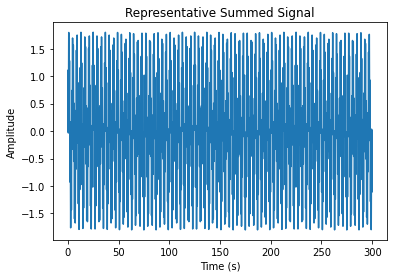

In [ ]:
plt.plot(t,sine_sum) 
plt.title('Representative Summed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

1d) Plot only the first minute of the signal against time. Again do not forget title and axis labels. 

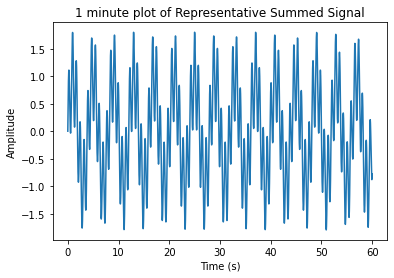

In [ ]:
Sum_sine = sine_sum[0:60*200] 
Sum_time = t[0:60*200]
plt.plot(Sum_time,Sum_sine)
plt.title('1 minute plot of Representative Summed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
arr = np.array([t,sine_sum])
#arr = np.array([Sum_time,Sum_sine])

1e) Implement a rolling window with a window size of 1 minute and 50% overlap. To demonstrate that the algorithm you implemented does produce the correct windows use a loop to create one plot per window that shows the original signal in the background and actual window on top of it.

In [ ]:
df = pd.DataFrame(arr.T, columns = ['Sum_time','Sum_sine']) #Create Data Frame

<Figure size 432x288 with 0 Axes>

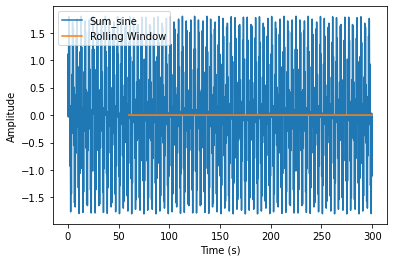

<Figure size 432x288 with 0 Axes>

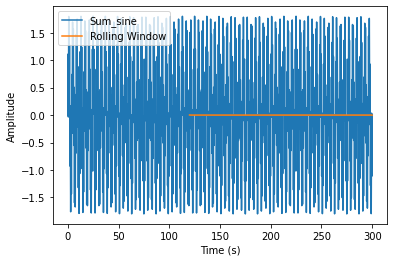

<Figure size 432x288 with 0 Axes>

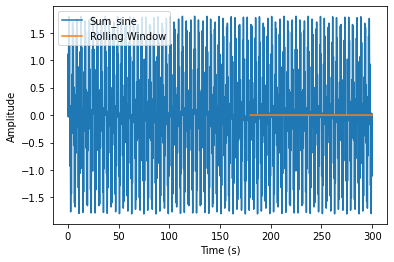

<Figure size 432x288 with 0 Axes>

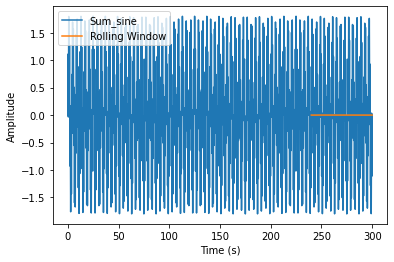

In [ ]:
iter = range(5)
for t_rw in range(1, 5): #For Loop to create plot with different rolling window size
  df['Rolling Window'] = df['Sum_sine'].rolling(window=t_rw*60*200).mean()
  plt.figure()
  df.plot.line(x='Sum_time',y=['Sum_sine','Rolling Window']) #Original Signal
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  print('\n')
  plt.show()

*1f*) Implement a moving average filter with a rollling window of 1 minute and an overlap of 50%

<Figure size 432x288 with 0 Axes>

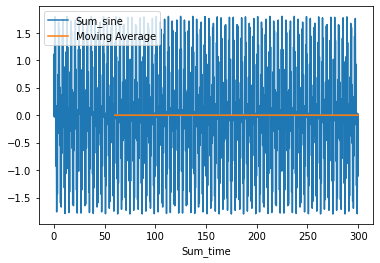

<Figure size 432x288 with 0 Axes>

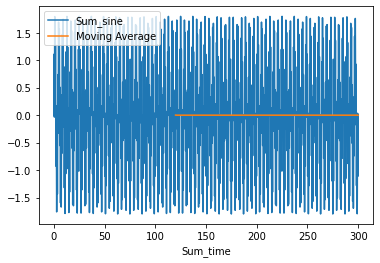

<Figure size 432x288 with 0 Axes>

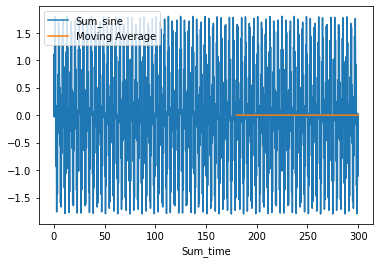

<Figure size 432x288 with 0 Axes>

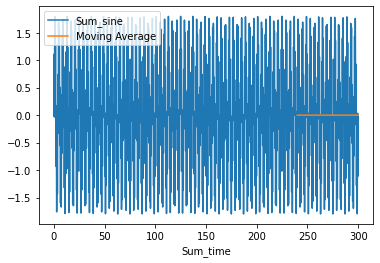

In [ ]:
iter = range(5)
for t_rw in range(1, 5): #For Loop to create plot with different rolling window size
  df['Moving Average'] = df['Sum_sine'].rolling(window=t_rw*60*200).mean()
  plt.figure()
  df.plot.line(x='Sum_time',y=['Sum_sine','Moving Average']) #Original Signal
  print('\n')
  plt.show()

1g) Adjust the window size of the moving average so that you still see the low frequency signal but you filter out the high frequency signal. Explain your choice for the window size in a comment.

<Figure size 432x288 with 0 Axes>

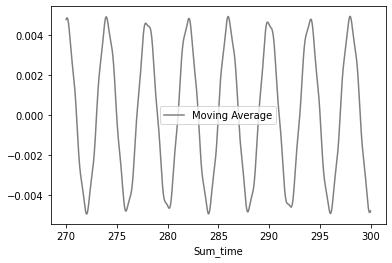

In [ ]:
df['Moving Average'] = df['Sum_sine'].rolling(window=54000).mean()
plt.figure()
df.plot.line(x='Sum_time',y=['Moving Average'],color='gray')
plt.show()
#Window size value was set to 54000 (4.5 minute window) based on trial and error
#using this window size filters out the high frequency signal (Smooth down the orginal signal that was made)


1h) Explain whether it is possible to tune the moving average filter so that it filters out the lower frequency while keeping the higher one in the signal. Your answer should contain a (mathematical) reasoning why it is possible or not.  

First i'll define moving average as:

$y[n]=\frac{1}{N}\sum_{i=-N+1}^{0}x[n+i]$,

the output will be the average of previous $N$ sample. The mathmatical definition above can be seen as filter that performs a convolution of $x[n]$ with a rectangular function. THis can only be performed in the time domain. In the frequency domain, this multiplies the Fourier transform with sinc function, resulting high frequency to attenuate. This gives the characteristic on a low pass filter.

Interestingnly an idea comes to my mind, if it is possible to do an inverse method of the moving avarage to attenuate the low frequency by doing a substraction of original signal with the filtered signal (LPF) to create a high pass filter. 

\color{red}{**I will have to look more into this**}